<center><h1> CPE 4040 Spring 2023: Homework 4</h1></center>

1. Write your answer in the cell provided under each question.
2. __You must write comments to explain your thoughts and earn full credit__.
3. __Show your execution result__.
4. Do your own work. __Do not copy-and-paste other people's (or AI's) codes.__
5. Please do not use pandas since it is not covered yet.

### Submission:
 * __Submit this notebook file and the pdf version__ - remember to add your name in the filename.
 * Deadline: 11:59 pm, 3/15 (Wednesday)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift

<h3>Q1: Rolling Dices (20 Points)</h3>
    
Assume that you have a fair dice of six faces, that is, it is equally likely to get any of the 6 possible outcomes for one dice roll.

__Q1.1 (5 points): Applying the same method that we used for coin tosses, write a code to simulate the probability of occurrence for each of the 6 numbers. You will perform at least 1,000,000 rolls.__

The result should be presented as follows:
   * Number of 1's = 100,000. Probability = 16.67%
   * Number of 2's = 96,000. Probability = 16.0%
   * ......

In [2]:
rolls = 1000000

diceResults = np.random.randint(1,7, size=rolls)

for i in range(6):
    print("Numbers of", i+1, "\b's =", (diceResults == i+1).sum(),". Probability = {:.2%}".format((diceResults == i+1).sum()/1000000), "%")

Numbers of 1 's = 166757 . Probability = 16.68% %
Numbers of 2 's = 166369 . Probability = 16.64% %
Numbers of 3 's = 167048 . Probability = 16.70% %
Numbers of 4 's = 166646 . Probability = 16.66% %
Numbers of 5 's = 166112 . Probability = 16.61% %
Numbers of 6 's = 167068 . Probability = 16.71% %


__Q1.2 (7 points): Suppose you are rolling two dices and add the two numbers together. The possible 11 outcomes range from 2 (1+1) to 12 (6+6).__ 

Write a simulation of 1,000,000 trials to find out the probability for each of the 11 outcomes.

The result should be presented as follows:
   * Number of 2's = 14,000. Probability = 2.80%
   * Number of 3's = 27,800. Probability = 5.56%
   * .....

In [3]:
diceResults1 = np.random.randint(1,7, size=rolls)
diceResults2 = np.random.randint(1,7, size=rolls)

diceCombine = diceResults1 + diceResults2

for i in range(2, 12):
    print("Numbers of", i, "\b's =", (diceCombine == i).sum(),". Probability = {:.2%}".format((diceCombine == i+1).sum()/1000000), "%")

Numbers of 2 's = 27605 . Probability = 5.55% %
Numbers of 3 's = 55509 . Probability = 8.33% %
Numbers of 4 's = 83308 . Probability = 11.14% %
Numbers of 5 's = 111449 . Probability = 13.89% %
Numbers of 6 's = 138882 . Probability = 16.66% %
Numbers of 7 's = 166575 . Probability = 13.81% %
Numbers of 8 's = 138140 . Probability = 11.15% %
Numbers of 9 's = 111542 . Probability = 8.34% %
Numbers of 10 's = 83441 . Probability = 5.59% %
Numbers of 11 's = 55944 . Probability = 2.76% %


__Q1.3 (8 points): Suppose you roll an uneven dice 5 times, what is the probability of getting '4' exactly 3 times? The probability for each face of the dice is as follows.__

      * P(1) = 0.10, P(2) = 0.15, P(3)=0.20, P(4) = 0.25, P(5) = 0.20, P(6) = 0.10

Write a simulation of 1,000,000 trials for the answer.

In [4]:
roll = 5
trials = 1000000
fourDots = 0.25

rolls = np.random.binomial(roll, fourDots, trials)

amountOfFoursThreeStacks = sum(rolls==4) / 3

prob = amountOfFoursThreeStacks / trials

print("The probability of getting 4 exactly 3 times = {:.2%}".format(prob))

The probability of getting 4 exactly 3 times = 0.49%


<h3>Q2: Picking Marbles (20 Points)</h3>

__Q2.1 (10 points): You have a bag of 12 marbles, 6 are red, 4 are white, and 2 are blue. You randomly pick three marbles from the bag. What is the probability of drawing 1 red, 1 white, and 1 blue (in this order)? The theoretical result is 2/55 ~3.636%. Write a simulation of 100,000 trials to verify the answer.__ 

Hint: You can follow the steps here:
1. Create an array of 12 elements, bag = np.array(['r','r','r','r','r','r','w','w','w','w','b','b'])
2. Create the desired outcome of 3 marbels of red, white, and blue, bag3 = np.array(['r','w','b'])
3. For each of the trial, you use np.random.permutation() to shuffle the bag array
4. Create a Boolean array by comparing the first three elements of the shuffled array with the desired outcome.
5. If the values the Boolean array are all True --> you have a match

In [5]:
bag = np.array(['r','r','r','r','r','r','w','w','w','w','b','b'])
bag3 = np.array(['r','w','b'])

trials = 100000
match = 0

for i in np.arange(trials):
    randomize = np.random.permutation(bag)
    if np.all(randomize[:3] == bag3):
        match += 1

prob = match / trials

print("The probabliity of matching the three marbles = {:.2%}".format(prob))

The probabliity of matching the three marbles = 3.60%


__Q2.2 (10 points) With the same bag, you again pick out three marbles. However, the order does not matter this time. What is the probability of drawing 1 red, 1 white, and 1 blue? The theoretical result is 12/55 ~21.82%. Write a simulation of 100,000 trials to verify the answer.__

Hint: This question is different from Q2.1 since the order of the drawing is not important as long as you have {r,w,b} in the outcome. You should look for another way to compare the desired outcome with the shuffled arrays.

In [6]:
unorderedMatch = 0

for i in np.arange(trials):
    unorderedRandom = np.random.permutation(bag)
    #If we check each of the colors in the first three, considering there are 12 marbles total
    #after iterating, it will reach the percentage.
    if 'r' in unorderedRandom[:3] and 'w' in unorderedRandom[:3] and 'b' in unorderedRandom[:3]:
        unorderedMatch += 1

unorderedProb = unorderedMatch / trials

print("The probabliity of matching the three marbles = {:.2%}".format(unorderedProb))

The probabliity of matching the three marbles = 21.65%


### Q3: Birthday Problem & Normal Distribution (20 Points)

__Q3.1 (6 points) With 30 people in the same room, what is the probability that at least three people are sharing the same birthday? Write a simulation of 100,000 trials to find the answer.__

In [7]:
amountInClass = 30
trials = 100000
matchBirth = 0

for i in np.arange(trials):
    day = np.random.randint(1,366,amountInClass)
    oneDay = np.unique(day)
    numberOfDays = len(oneDay)
    if numberOfDays < amountInClass:
        matchBirth += 1

prob = matchBirth / trials

print("The probability of three people sharing the same birthday in a class of 30 = {:.2%}".format(prob))

The probability of three people sharing the same birthday in a class of 30 = 70.64%


__Q3.2 (7 points) With 30 people in the same room, what is the probability that Exactly three people are sharing the same birthday? Write a simulation of 100,000 trials to find the answer.__

In [8]:
matchForThree = 0

for i in np.arange(trials):
    day = np.random.randint(1,366,amountInClass)
    oneDay = np.unique(day)
    numberOfDays = len(oneDay)
    if numberOfDays == amountInClass-3: #Will adjust the class amount by 3 every iteraction
        matchForThree += 1

exactThreeProb = matchForThree / trials

print("The probability of exactly three people sharing the same birthday in a class of 30 = {:.2%}".format(exactThreeProb))

The probability of exactly three people sharing the same birthday in a class of 30 = 8.06%


__Q3.3 (7 poins) A company produces light bulbs, and the weight of each bulb is normally distributed with a mean of 50 grams and a standard deviation of 2 grams. If the company wants to package the bulbs in boxes of 10, what is the probability that the total weight of the bulbs in a box is between 495 and 505 grams? Write a simulation of 100,000 trials to answer this.__

In [9]:
trials = 100000
mean = 50
std = 2
size = 10
packTheBox = 0

#Having to find the weight of the whole box, so we have to compensate by giving the two parameters and using the size
#to add them together.
for i in np.arange(trials):
    weight = np.random.normal(mean * size, std * np.sqrt(size))
    if weight >= 495 and weight <= 505:
        packTheBox += 1

probBox = packTheBox / trials

print("The probability of the total weight of the bulbs in a box between 495 and 505 grams = {:.2%}".format(probBox))

The probability of the total weight of the bulbs in a box between 495 and 505 grams = 57.07%


<h3>Q4: Square Wave and Random Noise (40 Points)</h3>

A communication system is commonly modelled by the transmitted signal, the channel, and the receiver. 

Let's consider a simple system where the signal is a square wave and the the channel adds __white Gaussian noise__ to the signal. Therefore, the received signal is represented by

__r(t) = s(t) + n(t)__, where s(t)=square wave, n(t)=Gaussian noise

__Q4.1 (8 points) One simple way to generate a periodic square wave is to take a sign function on the sine wave, that is,__
   
    Sq(t) = 1, if sin(2*pi*f*t) > 0;
           -1, if sin(2*pi*f*t) < 0; 
          
Plot a 5-second __square wave__ with amplitude 1, f=5Hz and sampling rate fs=100Hz. Use Matplotlib to plot the signal. You should have a total of 500 samples. 

Properly label the x-axis ("Time"), and y-axis ("Amplitude").

Hint: Use the __generate_sine_wave()__ function below

In [10]:
def generate_sine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin((2 * np.pi) * freq * t)
    return t, y

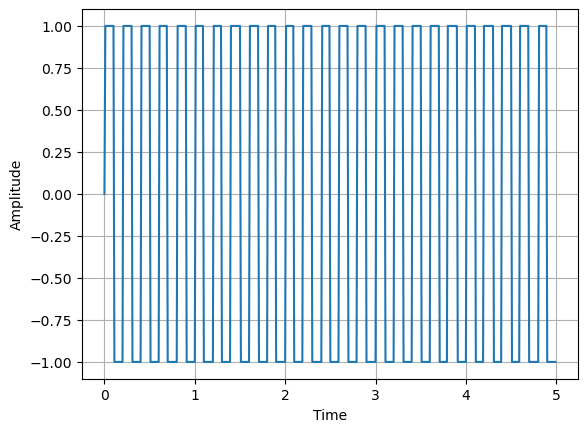

In [40]:
f = 5
fs = 100
duration = 5

time, amplitude = generate_sine_wave(f, fs, duration)
squareWave = np.sign(amplitude)

plt.plot(time, squareWave)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

__Q4.2 (7 points): Create an array of Gausian noise with mean = 0 and standard deviation = 0.5. Use np.random.normal to generate the noise array. The size of the noise array should also be 500.__

Add the square wave array from Q4.1 and the noise array together. Plot the resulting array.

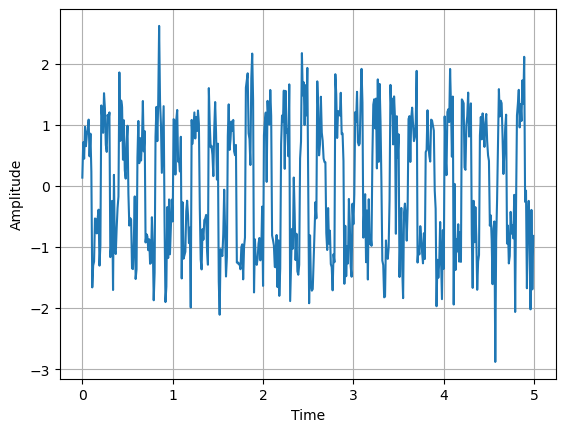

In [39]:
mean = 0
std = 0.5

gNoise = np.random.normal(mean, std, len(squareWave))

signal = squareWave + gNoise

plt.plot(time, signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

__Q4.3 (8 points): Signal-to-noise ratio (SNR) is an important quality indicator of the communication channel. The higher the SNR, the better the channel quality.__

     SNR(dB) = 10log10(P_s/P_n), where P_s is the average signal power and P_n is the average noise power.

Please calculate the SNR(dB) of this case. The average power of a sequence of signals = SUM (s^2)/N, where N is # of samples

In [27]:
powerSignals = sum(signal ** 2) / len(signal)

powerNoise = sum(gNoise **2) / len(gNoise)

SNR = 10 * np.log10(powerSignals / powerNoise)

print("SNR(db) =", SNR, "\bdb")

SNR(db) = 6.905584363159303 db


__Q4.4 (7 points) It is instructive to examine the frequency domain representation of the square wave. Apply the calculate_fft() function and use Matplotlib to plot the Fourier Transform result.__

In [31]:
def calculate_fft(signal,fs):
    N = len(signal)
    n = np.arange(N)
    freqs = n*fs/N               # the frequency bins
    mag_fft = abs(fft(signal)/N)   # calculate the magnitude of fft
    return freqs, mag_fft

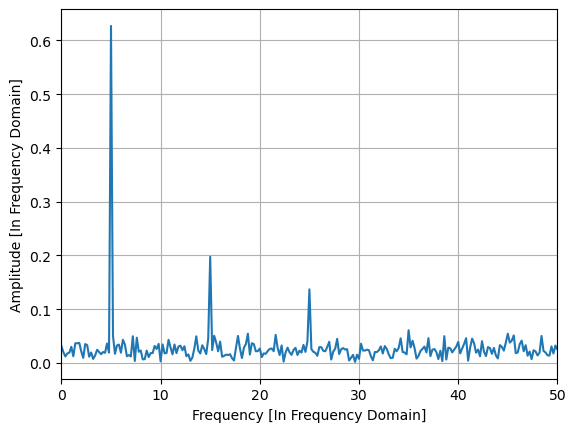

In [34]:
freq, mag = calculate_fft(signal, fs)

plt.plot(freq, mag)
plt.xlim(0, fs/2)
plt.xlabel('Frequency [In Frequency Domain]')
plt.ylabel('Amplitude [In Frequency Domain]')
plt.grid()
plt.show()

__Q4.5 Find Peak Frequency Components (10 points)__ 

Write a code to identify the frequencies of the top three peaks in the FFT plot, for frequency range from 1 to 50 Hz?

In [38]:
measures, magnitude = calculate_fft(signal, fs)

bounds = (measures > 1) & (measures < 50)
measures = measures[bounds]
magnitude = magnitude[bounds]
pos = np.argsort(magnitude)[::-1][:3]
topThree = measures[pos]

print("The Top Three Frequencies in the graph between 1 and 50hz are", topThree)


The Top Three Frequencies in the graph between 1 and 50hz are [ 5. 15. 25.]
